In [12]:
import os
path = 'C:/Users/leemj/Desktop/텍스트마이닝1_실습자료'
os.chdir(path)

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#그래프 스타일 지정
plt.style.use('seaborn') 
# ‘default’,‘dark_background’,‘classic’,‘ggplot’,‘seaborn’

import matplotlib as mpl
mpl.rcParams.update({'font.size':25})

plt.rc('font',family='Malgun Gothic')
#plt.rc('font', family='AppleGothic')

%matplotlib inline

In [9]:
data = pd.read_csv('suggestion.csv',encoding='utf-8')
data.shape

(123, 9)

In [10]:
data.head()

,sgId,title,category,content,start,end,vote,author,preprocessed_content
0,158,아이돌보미 서비스에 대한 건의 입니다.,보건복지,"육아 복지 서비스 중의 하나인 ""아이돌보미""서비스에 대한 의견입니다.아이돌보미 서비...",2019.03.19,2019.06.16,9,디딤돌,육아 복지 서비스 중 하나 아이돌 보미 서비스 대한 의견 아이돌 보미 서비스 이용 ...
1,157,행정부와 사법부간 전자문서 유통시스템 구축,일반행정,"행정부(중앙, 지방)에서는 온나라 전자문서 시스템을 통해 공문을 주고 받을 수 있습...",2019.03.13,2019.06.10,6,한들바람,행정부 중앙 지방 온나라 전자문서 시스템 통해 공문 수 또한 이문 시스템 통해 입법...
2,156,따뜻한 공동체 활성화를 위한 거점 공간 마련 필요.,공동체,○최근 동아리 및 모임시 함께 회의나 공동으로 모여서 이용할 수 있는 공간에 대한 ...,2019.03.08,2019.06.05,5,마이쭈샘,최근 동아리 및 임시 회의 공동 모 이용 수 공간 대한 필요성 대하 직장인 등 이 ...
3,155,미세 먼지 저감 아이디어 - 자동차가 공기 청정기가 된다면?,환경,아래와 같이 정리했듯이 자동차를 공해의 주범이 아닌 공기 청정의 주역으로 바꾸는 아...,2019.03.07,2019.06.04,4,봉팔버미,아래 정리 자동차 공해 범 공기 청정 주역 아이디어 원리 주변 공기 음이온 먼지 기...
4,154,담당자 제멋대로 운영되는 중소기업진흥공단(경기본부)의 정책자금 운영,국민참여,이번 정부 들어와서는 타 정부와는 다르게 규제혁신을 줄곧 추진하고있다하지만 실무에서...,2019.03.06,2019.06.03,4,포동이,이번 정부 타 정부 규제 혁신 줄곧 추진 실무 일 집행 공무원 정부 방침 커녕 근거...


In [14]:
from konlpy.tag import Okt, Kkma
okt = Okt()
kkma = Kkma()

In [15]:
%time okt_content_nouns = okt.nouns(''.join(str(data['content'].fillna(''))))
okt_content_nouns

Wall time: 4.74 s


['육아',
 '복지',
 '서비스',
 '중',
 '하나',
 '아이돌',
 '보미',
 '서비스',
 '대한',
 '의견',
 '아이돌',
 '보미',
 '비',
 '행정부',
 '중앙',
 '지방',
 '온나라',
 '전자문서',
 '시스템',
 '통해',
 '공문',
 '수',
 '습',
 '최근',
 '동아리',
 '및',
 '임시',
 '회의',
 '공동',
 '모',
 '이용',
 '수',
 '공간',
 '대한',
 '아래',
 '정리',
 '자동차',
 '공해',
 '범',
 '공기',
 '청정',
 '주역',
 '이번',
 '정부',
 '타',
 '정부',
 '규제',
 '혁신',
 '줄곧',
 '추진',
 '실무',
 '혁명',
 '임정',
 '수립',
 '주년',
 '맞이',
 '독립운동가',
 '대한',
 '관심',
 '저',
 '서울특별시',
 '사회',
 '지원',
 '센터',
 '영업',
 '원단',
 '철종',
 '사',
 '현황',
 '및',
 '문제점',
 '공공기관',
 '인력',
 '채용',
 '시',
 '요구',
 '필수',
 '서류',
 '개인',
 '신상',
 '정보',
 '채용',
 '근무',
 '채용',
 '인원',
 '명',
 '담',
 '당',
 '업',
 '무',
 '함주',
 '공원',
 '공설',
 '운동장',
 '및스',
 '문제점',
 '매월',
 '사회',
 '복무',
 '요원',
 '의무',
 '이수',
 '직무',
 '교육',
 '경우',
 '교육',
 '용이',
 '혁신',
 '요인',
 '공무원',
 '조직',
 '계급',
 '중심',
 '수직',
 '조직체',
 '저',
 '최근',
 '가족',
 '부터',
 '상당',
 '부모',
 '재산',
 '보복',
 '재산상속',
 '재',
 '부모님',
 '회사',
 '일',
 '평일',
 '은행',
 '업무',
 '가기',
 '직계',
 '가족',
 '제발',
 '제발',
 '변경',
 '에바',
 '얼마',
 '전',
 '여대생',
 '죽음',


In [16]:
%time kkma_content_nouns = kkma.nouns(''.join(str(data['content'].fillna(''))))
kkma_content_nouns

Wall time: 14.3 s


['0',
 '육아',
 '복지',
 '서비스',
 '중의',
 '하나',
 '하나인',
 '인',
 '아이',
 '아이돌',
 '돌',
 '미',
 '의견',
 '비',
 '1',
 '행',
 '행정부',
 '정부',
 '중앙',
 '지방',
 '나라',
 '전자',
 '전자문서',
 '문서',
 '시스템',
 '공문',
 '수',
 '있습',
 '2',
 '최근',
 '동아리',
 '모임',
 '회의',
 '공동',
 '이용',
 '공간',
 '3',
 '아래',
 '정리',
 '자동차',
 '공해',
 '주범',
 '공기',
 '청정',
 '주역',
 '4',
 '이번',
 '규제',
 '규제혁신',
 '혁신',
 '추진',
 '실무',
 '5',
 '삼일',
 '삼일혁명',
 '혁명',
 '임정',
 '수립',
 '100',
 '100주년',
 '주년',
 '독립',
 '독립운동가',
 '운동가',
 '관심',
 '6',
 '저',
 '서울특별',
 '서울특별시',
 '시',
 '사회적',
 '사회적경제지원센터',
 '경제',
 '지원',
 '센터',
 '공공',
 '공공구매영업지원단',
 '구매',
 '영업',
 '지원단',
 '철',
 '철종',
 '종',
 '7',
 '현황',
 '문제점',
 '공공기관',
 '기관',
 '인력',
 '인력채용',
 '채용',
 '요구',
 '필수',
 '서류',
 '개인',
 '개인신상정보',
 '신상',
 '정보',
 '8',
 '채용분야근무지채용',
 '분야',
 '근무지',
 '인원',
 '명',
 '담',
 '당',
 '업',
 '무함',
 '무함주공원',
 '주',
 '공원',
 '공설',
 '공설운동장',
 '운동장',
 '및스',
 '9',
 '사회',
 '사회복무요원',
 '복무',
 '요원',
 '의무적',
 '이수',
 '직무',
 '직무교육',
 '교육',
 '경우',
 '교육내용',
 '내용',
 '10',
 '요인',
 '공무원',
 '조직',
 '계급',
 '계급중심',
 '중심',
 '

In [17]:
from wordcloud import WordCloud, STOPWORDS
def displayWordCloud(data=None, backgroundcolor='white',width=1600,height=800):
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                         stopwords=STOPWORDS,
                         background_color=backgroundcolor,
                         width=width, height=height).generate(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [18]:
def okt_nouns_wordcloud(content):
    okt_content_nouns = okt.nouns(''.join(str(content.fillna(''))))
    displayWordCloud(' '.join(okt_content_nouns))

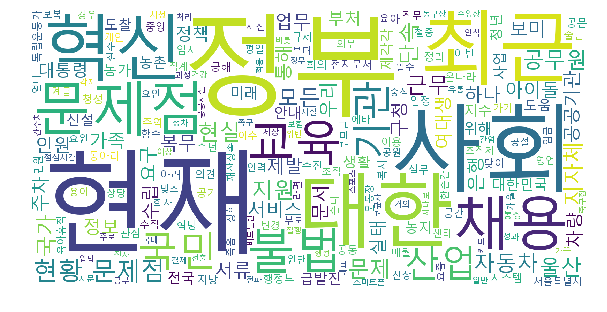

In [19]:
okt_nouns_wordcloud(data['content'])

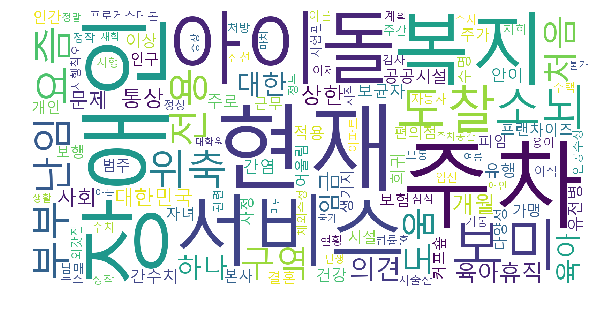

In [20]:
content = data.loc[data['category']=='보건복지','content']
okt_nouns_wordcloud(content)

반부패청렴 워드 클라우드


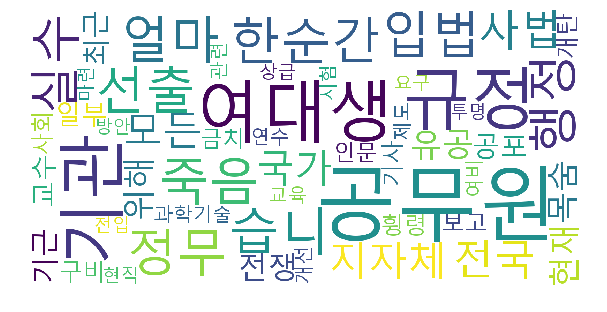

인권/평등 워드 클라우드


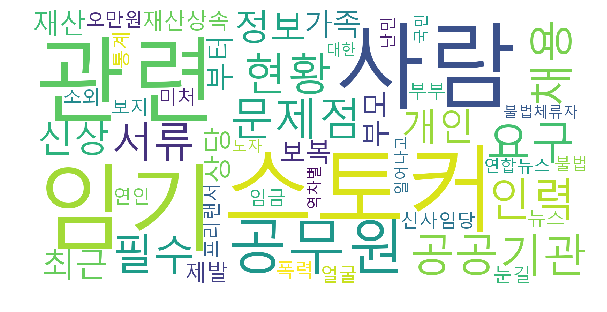

상생협력 워드 클라우드


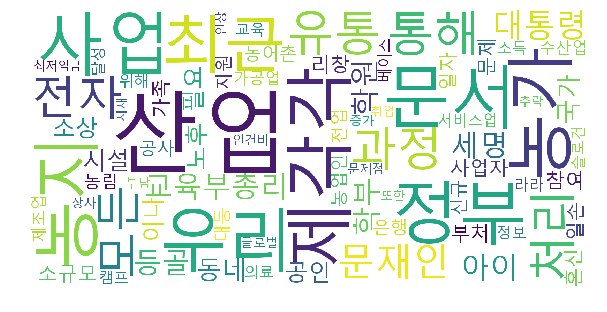

보건복지 워드 클라우드


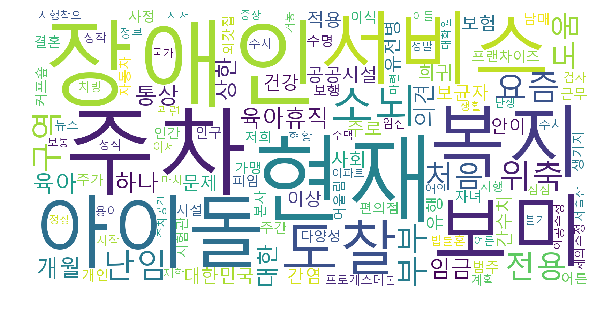

기타 워드 클라우드


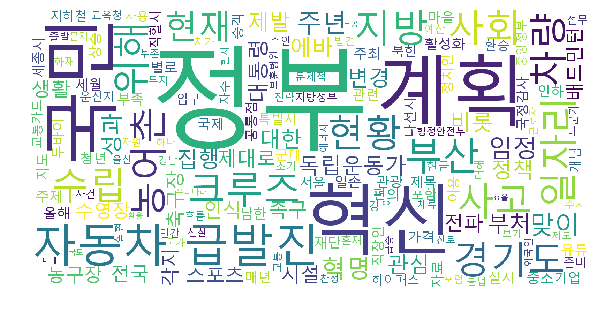

사회통합 워드 클라우드


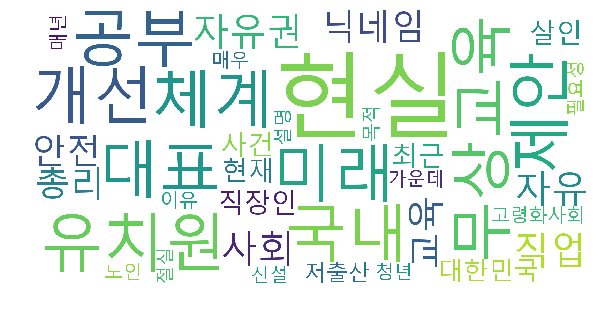

공동체 워드 클라우드


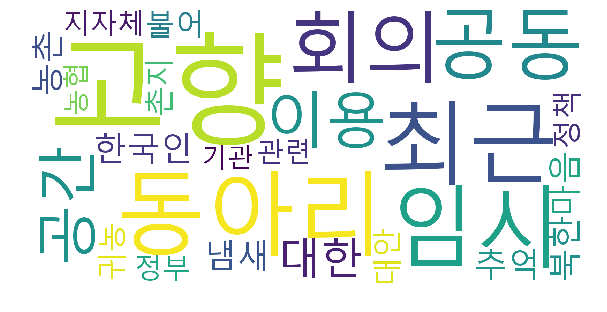

환경 워드 클라우드


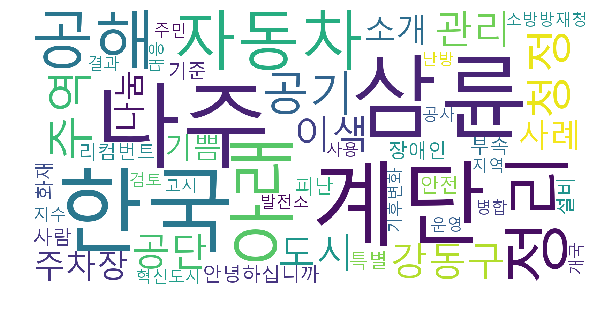

일반행정 워드 클라우드


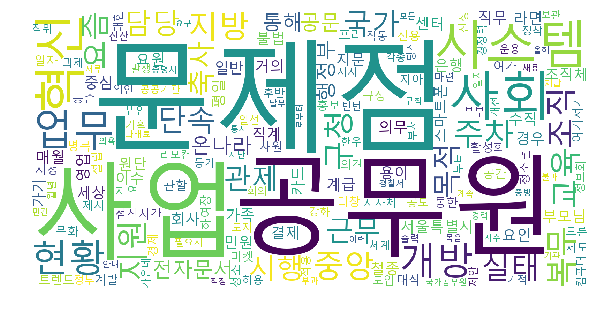

국민참여 워드 클라우드


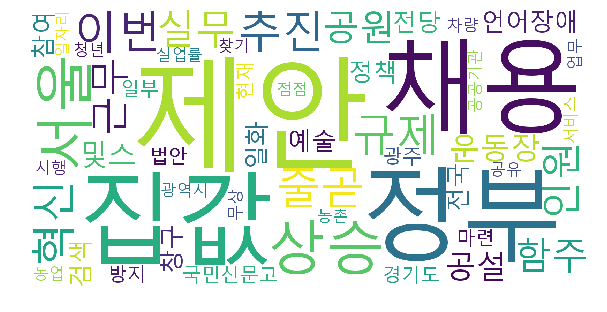

안전 워드 클라우드


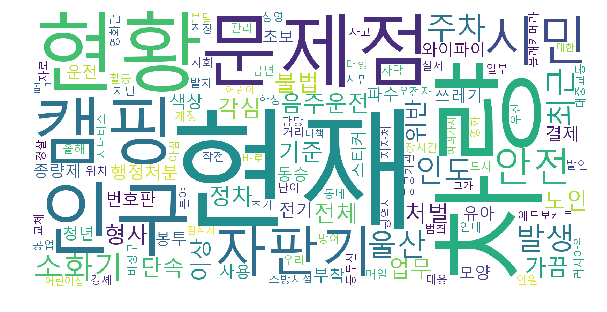

In [21]:
for x in list(set(data['category'])):
    print('{} 워드 클라우드'.format(x))
    content = data.loc[data['category'] == x,'content']
    okt_nouns_wordcloud(content)
